<a href="https://colab.research.google.com/github/mudassir112bb/PDM-PLAN/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Library


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder ,  StandardScaler , OrdinalEncoder , MinMaxScaler
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split,cross_val_score ,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier , ExtraTreeRegressor
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier , ExtraTreesRegressor
from xgboost import XGBClassifier
from sklearn.metrics import  classification_report , confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')



### Load Dataset

In [ ]:
df = pd.read_csv("heart_disease_uci.csv")

#show First 5 Rows
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Handling Missing Values

In [ ]:
#1. find the column are missing
(df.isnull().mean()*100).sort_values(ascending=False)

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
num          0.000000
dtype: float64

In [ ]:
#2. Find the column with Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
# Find Percentages of Error
(df.isnull().mean()* 100).sort_values(ascending=False)


ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
num          0.000000
dtype: float64

In [ ]:
missing_values = df.isnull().mean()[df.isnull().sum()>0].index.tolist()
print("Total missing Column : ",missing_values)

Total missing Column :  ['trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [ ]:
# see All columns which types is Object
df.select_dtypes(include='object').columns.tolist()


['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [ ]:
#see which column are not type of Objects
df.select_dtypes(exclude='object').columns.tolist()

['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

In [ ]:
#4. Apply a function    on Dataset
#5. check missing Values after Impute
from sklearn.ensemble import RandomForestClassifier , ExtraTreesRegressor


categorical_cols = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numeric_cols =   ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

num_imputer = IterativeImputer(estimator=ExtraTreeRegressor(random_state=0), random_state=0)

df_numeric_imputed = pd.DataFrame(num_imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Replace numeric columns in the original DataFrame
df[numeric_cols] = df_numeric_imputed



# Ensure all categorical columns are treated as strings or categorical types
for col in categorical_cols:
    df[col] = df[col].astype(str)  # Convert to string to enforce discrete labels

# Identify categorical columns that have missing values
cols_with_missing = [col for col in categorical_cols if df[col].isnull().sum() > 0]
print("Categorical columns to impute (in order):", cols_with_missing)

for col in cols_with_missing:
    # Check data type and unique values for debugging
    print(f"Imputing column: {col}, type: {df[col].dtype}, unique values: {df[col].unique()}")

    train_data = df[df[col].notnull()]
    test_data = df[df[col].isnull()]

    X_train = train_data.drop(columns=[col])
    y_train = train_data[col]
    X_test = test_data.drop(columns=[col])

    # Convert predictors to dummy variables
    X_train_enc = pd.get_dummies(X_train, drop_first=True)
    X_test_enc = pd.get_dummies(X_test, drop_first=True)

    # Align the dummy variables in train and test sets
    X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join='left', axis=1, fill_value=0)

    # Train the classifier
    clf = RandomForestClassifier(random_state=0)
    clf.fit(X_train_enc, y_train)

    # Predict missing values
    y_pred = clf.predict(X_test_enc)

    # Fill in the missing values
    df.loc[df[col].isnull(), col] = y_pred

print("\nMissing values after ML-based imputation:")
print(df.isnull().sum().sort_values(ascending=False))


Categorical columns to impute (in order): []

Missing values after ML-based imputation:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

# Define column types
numerical_cols = ["trestbps", "chol", "thalch", "oldpeak"]
binary_cols = ["fbs", "exang", "restecg"]
categorical_cols = ["slope", "ca", "thal"]

# Fill numerical columns with median
num_imputer = SimpleImputer(strategy="median")
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Fill binary columns with mode (most frequent value)
bin_imputer = SimpleImputer(strategy="most_frequent")
df[binary_cols] = bin_imputer.fit_transform(df[binary_cols])

# Fill categorical columns with mode
cat_imputer = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# Check if all missing values are filled
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
# Filling numeric columns with median
numeric_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Filling categorical/binary columns with mode
categorical_cols = ['fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check for any remaining missing values
missing_values_after = df.isnull().sum()
missing_values_after


id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

###  Handling outlier

In [ ]:
#to remove where patience treestbps ==0
df = df[df['trestbps']!=0]

In [ ]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
df.shape

(918, 16)

### Exploratory Data Analysis

Explore Each column on Dataset

In [ ]:
# Exploring Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        918 non-null    float64
 1   age       918 non-null    float64
 2   sex       918 non-null    object 
 3   dataset   918 non-null    object 
 4   cp        918 non-null    object 
 5   trestbps  918 non-null    float64
 6   chol      918 non-null    float64
 7   fbs       918 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    918 non-null    float64
 10  exang     918 non-null    object 
 11  oldpeak   918 non-null    float64
 12  slope     918 non-null    object 
 13  ca        918 non-null    object 
 14  thal      918 non-null    object 
 15  num       918 non-null    float64
dtypes: float64(7), object(9)
memory usage: 121.9+ KB


In [ ]:
#Now impute the missng Value
imputer =IterativeImputer(max_iter=10 ,  random_state = 42)

df["trestbps"] =    imputer.fit_transform(df[['trestbps']])


#check null values

df['trestbps'].isnull().mean()

0.0

## Machine Learning

In [ ]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,num
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,459.863834,53.508715,132.545752,200.898693,136.713508,0.911983,0.991285
std,265.664505,9.434815,18.945931,110.718283,26.057224,1.110311,1.140094
min,1.000000,28.000000,80.000000,0.000000,60.000000,-2.600000,0.000000
25%,230.250000,47.000000,120.000000,175.250000,119.000000,0.000000,0.000000
50%,459.500000,54.000000,130.000000,223.000000,139.000000,0.500000,1.000000
75%,688.750000,60.000000,142.000000,269.000000,156.000000,1.600000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        918 non-null    float64
 1   age       918 non-null    float64
 2   sex       918 non-null    object 
 3   dataset   918 non-null    object 
 4   cp        918 non-null    object 
 5   trestbps  918 non-null    float64
 6   chol      918 non-null    float64
 7   fbs       918 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    918 non-null    float64
 10  exang     918 non-null    object 
 11  oldpeak   918 non-null    float64
 12  slope     918 non-null    object 
 13  ca        918 non-null    object 
 14  thal      918 non-null    object 
 15  num       918 non-null    float64
dtypes: float64(7), object(9)
memory usage: 121.9+ KB


In [ ]:
# Lets know about Target Varible like num
df['num'].value_counts()

num
0.0    411
1.0    265
2.0    109
3.0    105
4.0     28
Name: count, dtype: int64

##### IN my Target varable `num`

`0=  no heart decease`
`1 = mild heart disease`
`2 = moderate heart dicease`
`3 = severe heart decease`
`4 - crttical heart disease`

0. no heart decease
1 = mild heart disease
2 = moderate heart dicease
3 = severe heart decease
4 - crttical heart disease

In [ ]:
# For Training Machine Learning Model We drop id
df = df.drop('id', axis=1)

In [ ]:

# Split Data into x, y
x = df.drop('num', axis=1)
y = df['num']



# Initialize dictionary to store encoders
label_encoders = {}

# Encode categorical features
for col in x.columns:
    if x[col].dtype == 'object' or x[col].dtype == 'category':
        le = LabelEncoder()
        x[col] = le.fit_transform(x[col])
        label_encoders[col] = le  # Store encoder for reverse transformation

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Data successfully preprocessed and split!")


Data successfully preprocessed and split!


In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
   #"Naive Bayes": GaussianNB(),
   "XGBoost":XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
   #"LightGBM": lgb.LGBMClassifier(random_state=42)
}
best_score = 0
best_model_name =  None
model_result = []
for name,model in models.items():
   model.fit(x_train,y_train)
   y_pred = model.predict(x_test)
   accuracy = accuracy_score(y_test,y_pred)
   report = classification_report(y_test, y_pred, output_dict=True)

   model_result.append({
    'name': name,
    'accuracy': accuracy,



   }
   )

if accuracy > best_score:
        best_score = accuracy
        best_model = model
        best_model_name = name

#oblib.dump(model,"best_heart_dicease_prediction_model.pkl")


# Convert results to DataFrame
results_df = pd.DataFrame(model_result)


In [ ]:
results_df.sort_values(by="accuracy",ascending=False)

,name,accuracy
6,XGBoost,0.630435
3,Gradient Boosting,0.608696
1,Random Forest,0.603261
5,Decision Tree,0.543478
0,Logistic Regression,0.500000
4,KNN,0.472826
2,SVM,0.461957


# Lets Increase the Model Accuracy #


Dropped 2 duplicate rows.

Categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
Applied one-hot encoding to categorical variables.


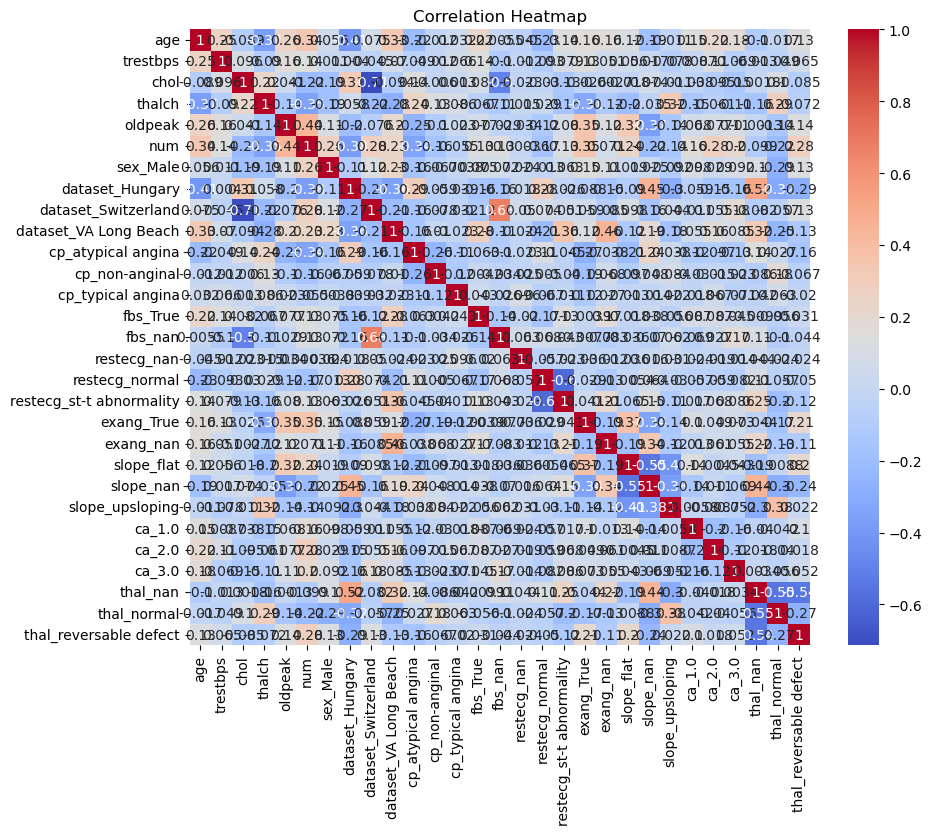

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Random Forest Accuracy: 95.65%
Classification Report (Random Forest):
               precision    recall  f1-score   support

       False       0.99      0.96      0.97       145
        True       0.86      0.95      0.90        39

    accuracy                           0.96       184
   macro avg       0.92      0.95      0.94       184
weighted avg       0.96      0.96      0.96       184


Decision Tree Accuracy: 92.39%
Classification Report (Decision Tree):
               precision    recall  f1-score   support

       False       0.95      0.96      0.95       145
        True       0.84      0.79      0.82        39

    accuracy                           0.92       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.92      0.92      0.92       184


SVM Accuracy: 94.02%
Classification Report (SVM):
               precision    recall  f1-score   support

       False       0.99      0.9

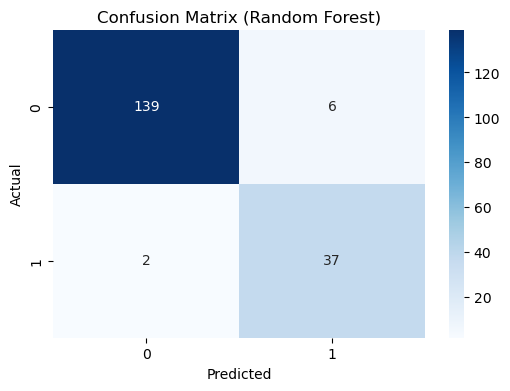

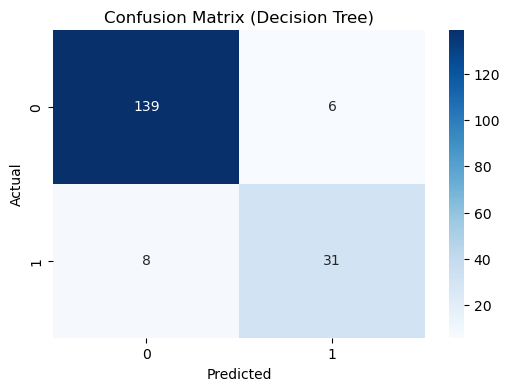

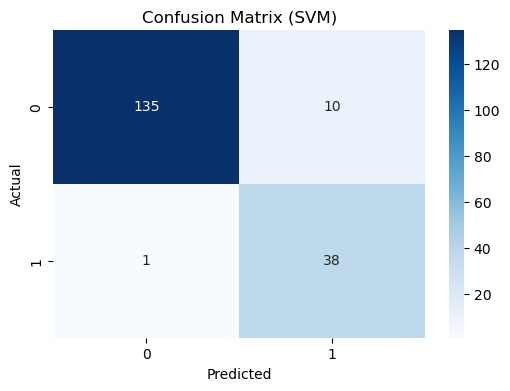

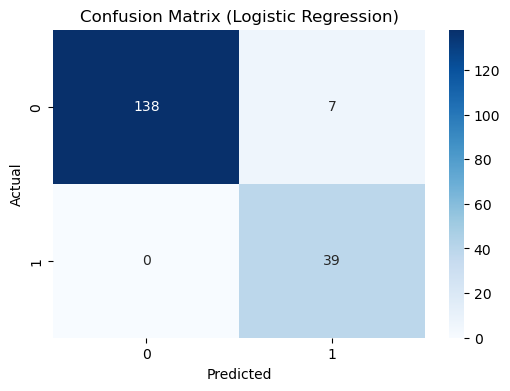


--- Model Accuracy Comparison ---
Random Forest: 95.65%
Decision Tree: 92.39%
SVM: 94.02%
Logistic Regression: 96.20%

Best performing model: Logistic Regression (96.20%)


In [ ]:
# ------------------------------
# 1. Import Libraries
# ------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# ------------------------------
# 2. Load and Clean the Data
# ------------------------------
# NOTE: Replace this with your actual data
# df = pd.read_csv("your_dataset.csv")

# Handle missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

# Drop duplicate rows
before_duplicates = df.shape[0]
df.drop_duplicates(inplace=True)
after_duplicates = df.shape[0]
print(f"\nDropped {before_duplicates - after_duplicates} duplicate rows.")

# ------------------------------
# 3. Encode Categorical Variables
# ------------------------------
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", categorical_cols.tolist())

if len(categorical_cols) > 0:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    print("Applied one-hot encoding to categorical variables.")

# ------------------------------
# 4. Correlation Heatmap (Optional)
# ------------------------------
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# ------------------------------
# 5. Feature Scaling and Splitting
# ------------------------------
if 'target' not in df.columns:
    target_column = df.columns[-1]
    df.rename(columns={target_column: 'target'}, inplace=True)

X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------------
# 6. Random Forest (with GridSearchCV)
# ------------------------------
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid,
                       cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy: {:.2f}%".format(acc_rf * 100))
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# ------------------------------
# 7. Decision Tree
# ------------------------------
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print("\nDecision Tree Accuracy: {:.2f}%".format(acc_dt * 100))
print("Classification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))

# ------------------------------
# 8. Support Vector Machine (SVM)
# ------------------------------
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print("\nSVM Accuracy: {:.2f}%".format(acc_svm * 100))
print("Classification Report (SVM):\n", classification_report(y_test, y_pred_svm))

# ------------------------------
# 9. Logistic Regression
# ------------------------------
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("\nLogistic Regression Accuracy: {:.2f}%".format(acc_lr * 100))
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_lr))

# ------------------------------
# 10. Confusion Matrices for All Models
# ------------------------------
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Random Forest
plot_conf_matrix(y_test, y_pred_rf, "Confusion Matrix (Random Forest)")

# Decision Tree
plot_conf_matrix(y_test, y_pred_dt, "Confusion Matrix (Decision Tree)")

# SVM
plot_conf_matrix(y_test, y_pred_svm, "Confusion Matrix (SVM)")

# Logistic Regression
plot_conf_matrix(y_test, y_pred_lr, "Confusion Matrix (Logistic Regression)")


# ------------------------------
# 11. Model Comparison
# ------------------------------
model_accuracies = {
    'Random Forest': acc_rf,
    'Decision Tree': acc_dt,
    'SVM': acc_svm,
    'Logistic Regression': acc_lr
}

print("\n--- Model Accuracy Comparison ---")
for model, score in model_accuracies.items():
    print(f"{model}: {score * 100:.2f}%")

best_model = max(model_accuracies, key=model_accuracies.get)
print(f"\nBest performing model: {best_model} ({model_accuracies[best_model]*100:.2f}%)")




Model Evaluation Metrics:

              Model  Accuracy  Precision  Recall  F1 Score
      Random Forest    0.9565     0.9592  0.9565    0.9573
      Decision Tree    0.9239     0.9227  0.9239    0.9232
                SVM    0.9402     0.9500  0.9402    0.9424
Logistic Regression    0.9620     0.9677  0.9620    0.9631


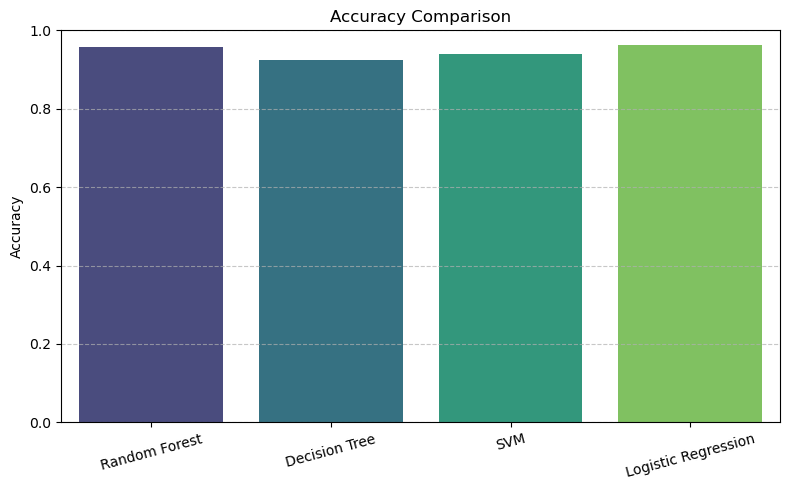

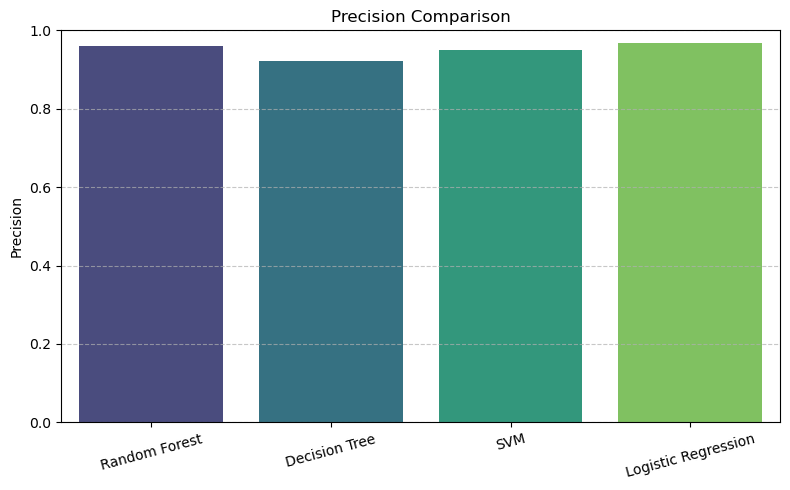

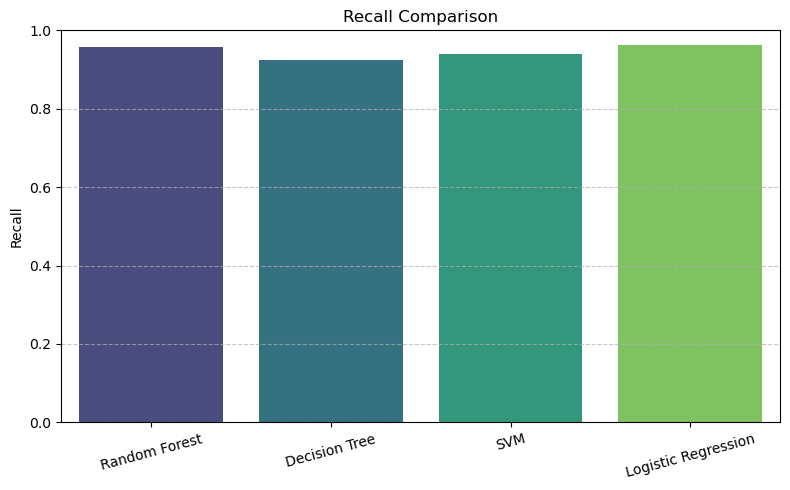

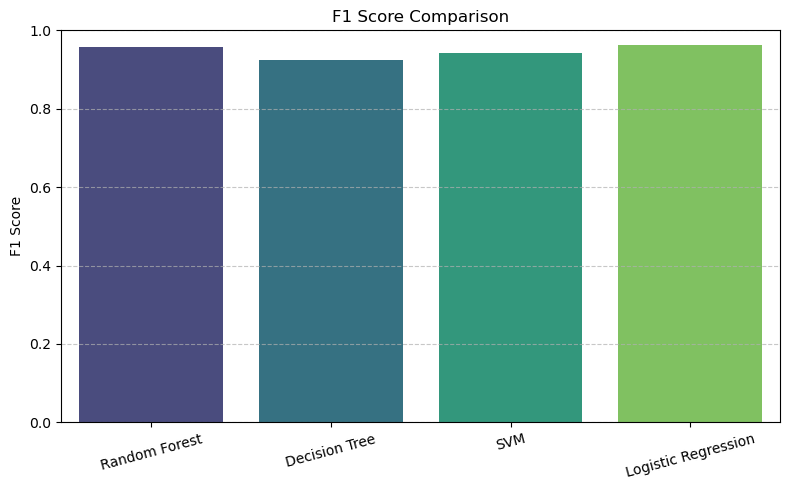

In [ ]:
# ------------------------------
# 12. Separate Bar Charts for Accuracy, Precision, Recall, F1-Score
# ------------------------------
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics
models = ['Random Forest', 'Decision Tree', 'SVM', 'Logistic Regression']
accuracies = [
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_lr)
]
precisions = [
    precision_score(y_test, y_pred_rf, average='weighted'),
    precision_score(y_test, y_pred_dt, average='weighted'),
    precision_score(y_test, y_pred_svm, average='weighted'),
    precision_score(y_test, y_pred_lr, average='weighted')
]
recalls = [
    recall_score(y_test, y_pred_rf, average='weighted'),
    recall_score(y_test, y_pred_dt, average='weighted'),
    recall_score(y_test, y_pred_svm, average='weighted'),
    recall_score(y_test, y_pred_lr, average='weighted')
]
f1_scores = [
    f1_score(y_test, y_pred_rf, average='weighted'),
    f1_score(y_test, y_pred_dt, average='weighted'),
    f1_score(y_test, y_pred_svm, average='weighted'),
    f1_score(y_test, y_pred_lr, average='weighted')
]

# Print metrics table
metrics_table = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})
print("\nModel Evaluation Metrics:\n")
print(metrics_table.round(4).to_string(index=False))

# Helper function to plot a single metric
def plot_metric(metric_values, metric_name):
    plt.figure(figsize=(8, 5))
    sns.barplot(x=models, y=metric_values, palette='viridis')
    plt.title(f'{metric_name} Comparison')
    plt.ylabel(metric_name)
    plt.ylim(0, 1)
    plt.xticks(rotation=15)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot each metric
plot_metric(accuracies, "Accuracy")
plot_metric(precisions, "Precision")
plot_metric(recalls, "Recall")
plot_metric(f1_scores, "F1 Score")
